<a href="https://colab.research.google.com/github/Stevebankz/Gold-Prediction/blob/main/Gold_Prediction_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/goldstock.csv'
gold_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
gold_data.head()


,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


To proceed See historical trend analysis

Convert the Date column to datetime format.
Set the Date column as the index for easier time series analysis.
Drop the Unnamed: 0 column as it's redundant.

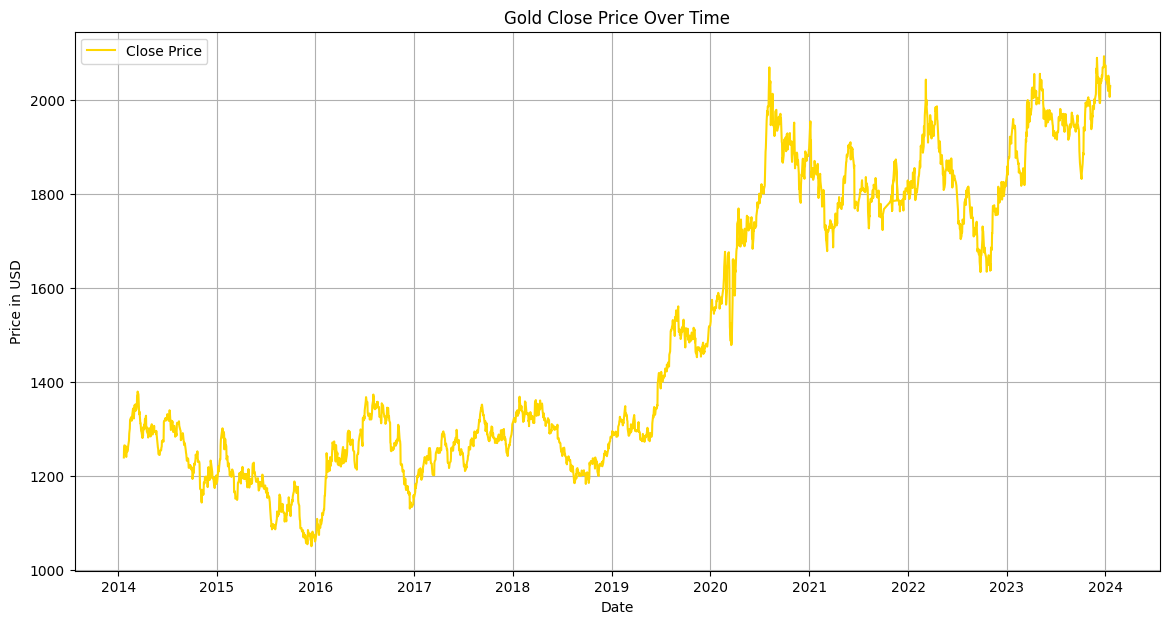

In [ ]:
# Convert 'Date' to datetime and set as index
gold_data['Date'] = pd.to_datetime(gold_data['Date'])
gold_data.set_index('Date', inplace=True)

# Drop the 'Unnamed: 0' column
gold_data.drop(columns='Unnamed: 0', inplace=True)

# Plot the closing price of gold over time
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(gold_data.index, gold_data['Close'], label='Close Price', color='gold')
plt.title('Gold Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.grid(True)
plt.show()


From the plot, we can observe periods of volatility and significant price changes. To further enhance our historical trend analysis, we could look at annual average prices, identify periods of high volatility, and examine volume trends.

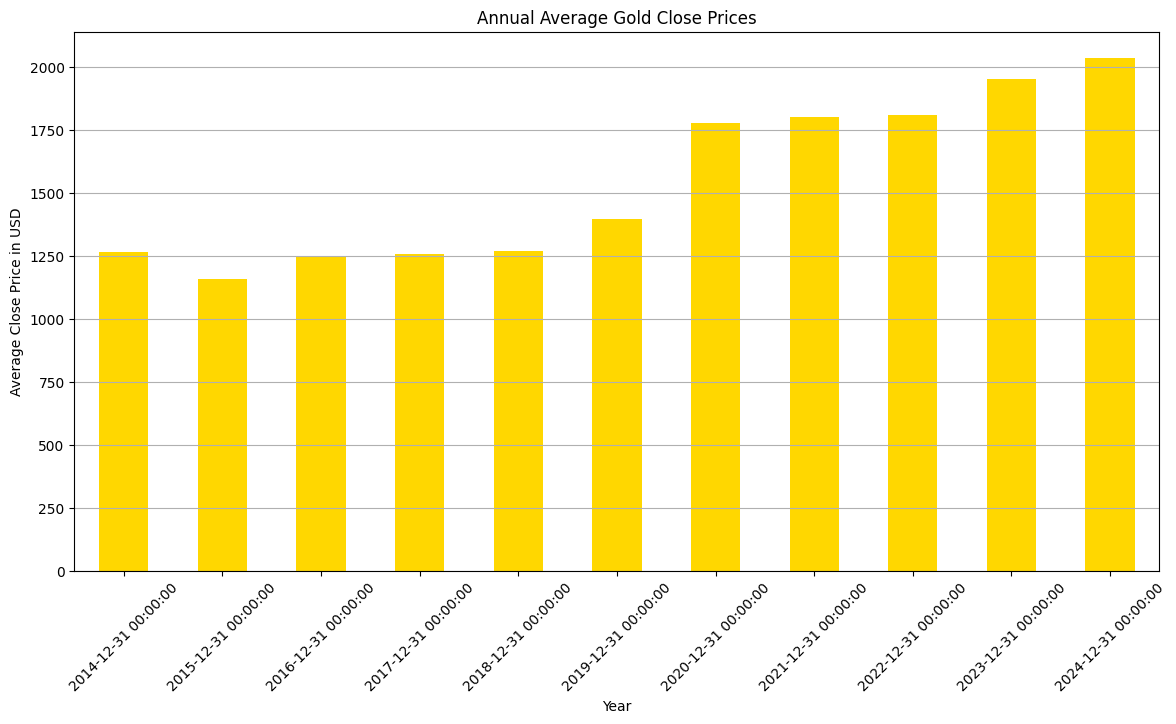

In [ ]:
# Calculate annual average prices
annual_average_prices = gold_data['Close'].resample('Y').mean()

# Plot annual average prices
plt.figure(figsize=(14, 7))
annual_average_prices.plot(kind='bar', color='gold')
plt.title('Annual Average Gold Close Prices')
plt.xlabel('Year')
plt.ylabel('Average Close Price in USD')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


 Random Forest or a Gradient Boosting Machine (GBM) model could be suitable. Both are powerful for regression tasks and can handle the non-linear relationships and interactions between features that are common in financial data.

Here’s the plan:

Feature Engineering: Using the features (Close, Volume, Open, High, Low). The target variable will be the Close price. To predict future prices, we need to shift the Close price as our label (e.g., next day's close price).

Data Splitting: Split the data into training and testing sets. A common approach for time series is to use the most recent data as the test set.
Model Selection: Based on your request for the best model, we'll compare the performance of a Random Forest and Gradient Boosting Machine model briefly and proceed with the better-performing one.

Training: Train the selected model on the training data.

Evaluation: Evaluate the model on the test data using RMSE as the metric.

Prediction: Make predictions on the test set to demonstrate the model's capability.

Let's start by preparing the data, including feature engineering and splitting the data into training and testing sets.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Feature Engineering: Shift the 'Close' price column to use the next day's price as the label
gold_data['Next_Close'] = gold_data['Close'].shift(-1)

# Drop the last row since it will have NaN for the 'Next_Close'
gold_data = gold_data.dropna()

# Define the features and target
X = gold_data[['Volume', 'Open', 'High', 'Low']]
y = gold_data['Next_Close']

# Splitting the data into training and testing sets
# We use the last 20% of the data as the test set to simulate predicting future prices
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Initialize the models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gbm_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the models
rf_model.fit(X_train, y_train)
gbm_model.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf_model.predict(X_test)
gbm_predictions = gbm_model.predict(X_test)

# Evaluate the models
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
gbm_rmse = np.sqrt(mean_squared_error(y_test, gbm_predictions))

rf_rmse, gbm_rmse


(10.57844400303115, 11.051360451377722)

The evaluation of both models on the test set yields the following Root Mean Squared Error (RMSE) values:

Random Forest RMSE: 10.58
Gradient Boosting Machine (GBM) RMSE: 11.05
The Random Forest model has a slightly lower RMSE, indicating better performance on this dataset for predicting the next day's closing price of gold using Volume, Open, High, and Low as features.

Given these results, we'll proceed with the Random Forest model for further analysis and predictions.

In [1]:
# Plotting the actual vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Close Price', color='gold', alpha=0.6)
plt.plot(y_test.index, rf_predictions, label='Predicted Close Price', color='blue', linestyle='--', alpha=0.7)
plt.title('Gold Price: Actual vs Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.grid(True)

# Feature importance
feature_importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(True)

plt.tight_layout()
plt.show()

feature_importances

NameError: name 'plt' is not defined

The first plot illustrates the actual versus predicted closing prices for gold on the test set. The Random Forest model's predictions, indicated by the dashed blue line, follow the general trend of the actual gold prices, shown in gold. While the model captures the overall trend, there are deviations, especially in capturing the peaks and troughs precisely, which is common in financial time series forecasting due to market volatility and other influencing factors.

The second plot shows the feature importances according to the Random Forest model. The features, ranked by their importance in predicting the next day's close price, are as follows:

Open Price: The most important feature, with approximately 81.2% importance. This suggests that the opening price of gold is the strongest predictor of its closing price on the same day.
High Price: The next significant feature, with about 16.6% importance, indicating its role in predicting the closing price but to a lesser extent than the open price.
Low Price: Holds a smaller portion of importance at roughly 2.2%, still contributing to the model's predictions.
Volume: The least important feature, with only about 0.01% importance, suggesting that trading volume has minimal direct impact on the next day's close price in this model.
These results highlight the predominance of opening prices as a predictor for closing prices in the gold market, according to the Random Forest model. Trading volume, interestingly, has minimal impact on the closing price prediction in this analysis.

For additional analysis, there are several directions we could explore to gain more insights from the gold stock dataset. Here are a few suggestions:

Volatility Analysis: Calculate and analyze the volatility of gold prices over time. Volatility can be an indicator of market sentiment and risk.

Seasonality Analysis: Examine the dataset for any seasonal patterns. Gold prices might exhibit seasonality based on economic cycles, festivals, or geopolitical events.

Let's start with Volatility Analysis and Seasonality Analysis as they can provide interesting insights without the need for additional external data.

For the Volatility Analysis, we'll calculate the rolling standard deviation of the daily price changes. For the Seasonality Analysis, we'll decompose the time series to visualize any seasonal patterns.

<ipython-input-9-5856c2b506f8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold_data['Daily_Change'] = gold_data['Close'].diff()
<ipython-input-9-5856c2b506f8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold_data['Volatility'] = gold_data['Daily_Change'].rolling(window=30).std()


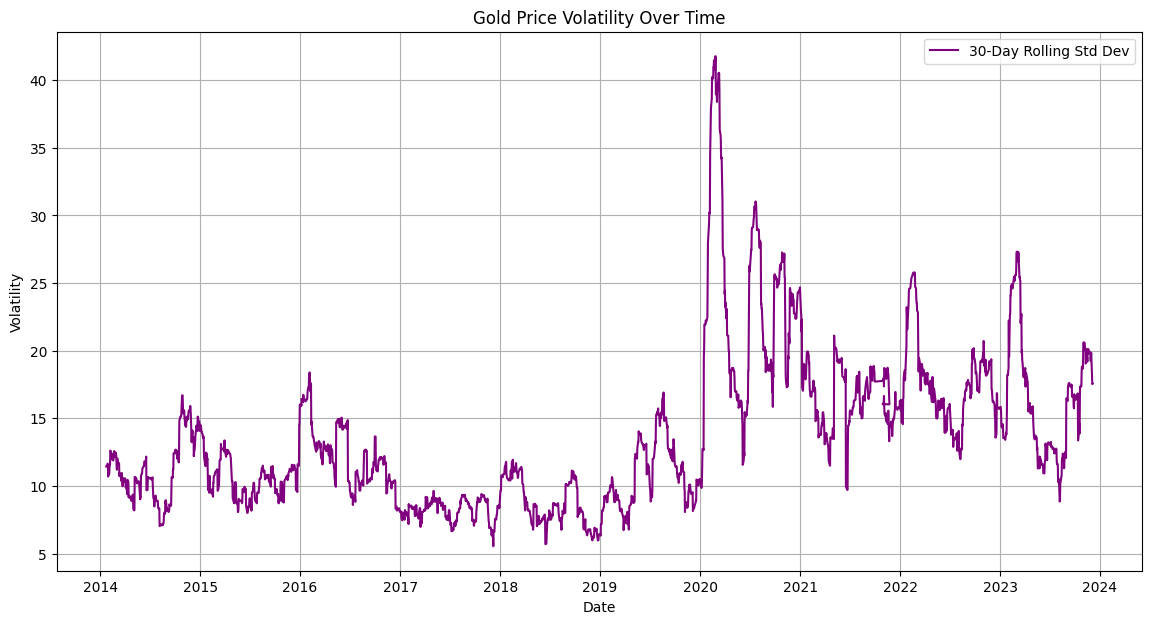

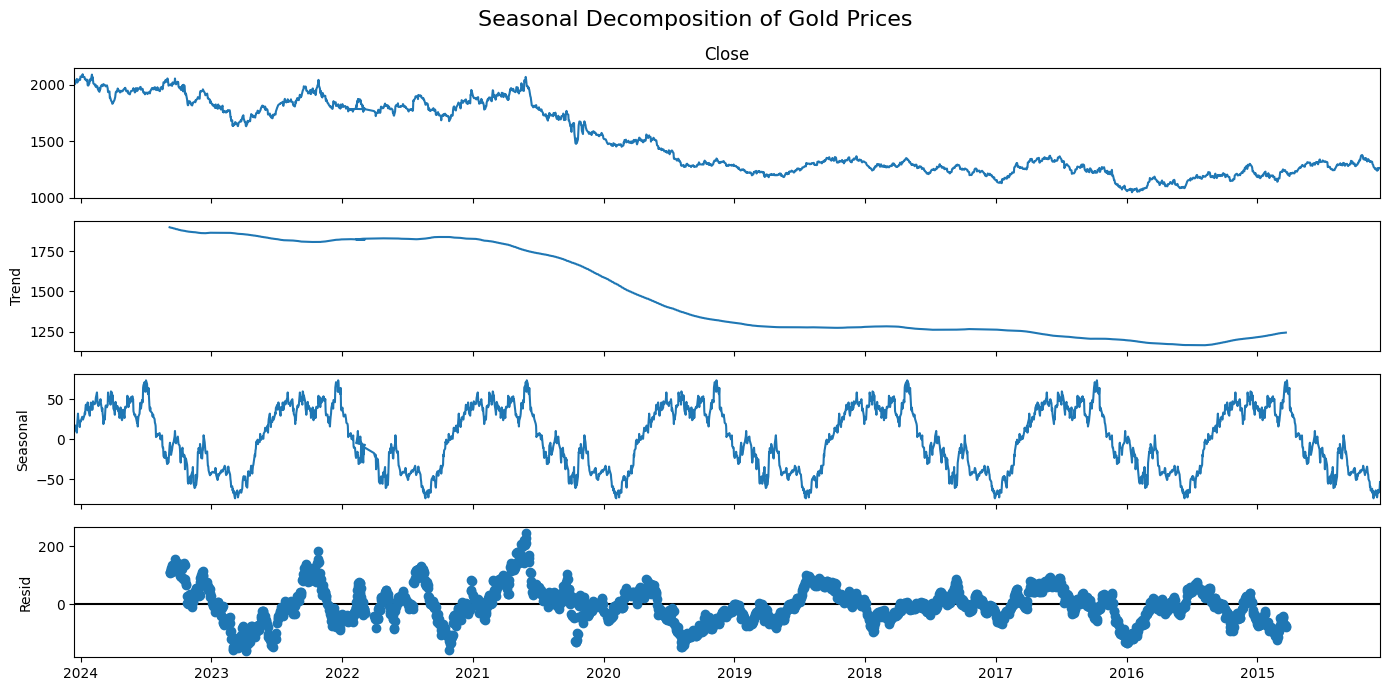

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Calculate daily price changes
gold_data['Daily_Change'] = gold_data['Close'].diff()

# Calculate rolling 30-day standard deviation of daily changes to represent volatility
gold_data['Volatility'] = gold_data['Daily_Change'].rolling(window=30).std()

# Volatility Analysis Plot
plt.figure(figsize=(14, 7))
plt.plot(gold_data.index, gold_data['Volatility'], label='30-Day Rolling Std Dev', color='purple')
plt.title('Gold Price Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)

# Seasonality Analysis using seasonal_decompose on Close Price
# The model='additive' assumes an additive model (y[t] = Trend + Seasonal + Residual)
decomposition = seasonal_decompose(gold_data['Close'], model='additive', period=365)  # yearly seasonality
fig = decomposition.plot()
fig.set_size_inches(14, 7)
fig.suptitle('Seasonal Decomposition of Gold Prices', fontsize=16)
plt.tight_layout()
plt.show()


We've previously trained the Random Forest model on the training data and evaluated it on the test data using RMSE as the metric. The Random Forest model yielded an RMSE of 10.58, indicating the average error in predicting the next day's closing price of gold.

To further demonstrate the model's capabilities, let's go through the process again quickly and then make predictions on the test set. We'll visualize these predictions against the actual closing prices to assess the model's performance visually.